In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
import collections
import queue
import scipy.io as spio

In [1]:
def Euclidian_Dist(x,y):
  
  return  np.linalg.norm(x-y)   ## write your code here

def Dist_mat(X):
## write your code here  
  m=np.zeros((len(X),len(X)))
  for i in range(0,len(X)):
    for j in range(0,len(X)):
      if i==j:
        m[i][j]='inf'
      else:
        m[i][j]=Euclidian_Dist(X[i],X[j])
 
  
  return m

def combine(X):
  ## write your code here
  
  matrix=Dist_mat(X.T)
  print(matrix)
  m=np.min(matrix)
  ind=np.where(matrix==m)
  X=X.transpose()
  newX=0.5*(X[ind[0][0]]+X[ind[0][1]])
  for i in range(len(X)):
    if i==ind[0][0] or i == ind[0][1]:
      continue
    else:
      newX=np.append(newX,X[i])
      
  return newX.reshape(len(X)-1,2)

[[       inf 1.         5.         6.40312424 7.43303437]
 [1.                inf 4.24264069 5.65685425 6.72681202]
 [5.         4.24264069        inf 1.41421356 2.5       ]
 [6.40312424 5.65685425 1.41421356        inf 1.11803399]
 [7.43303437 6.72681202 2.5        1.11803399        inf]]

 Mean of cluster after iteration
[[1.5 5.  6.  6.5]
 [1.  4.  5.  6. ]]
[[       inf 4.60977223 6.02079729 7.07106781]
 [4.60977223        inf 1.41421356 2.5       ]
 [6.02079729 1.41421356        inf 1.11803399]
 [7.07106781 2.5        1.11803399        inf]]

 Mean of cluster after iteration
[[6.25 1.5  5.  ]
 [5.5  1.   4.  ]]
[[       inf 6.54312616 1.95256242]
 [6.54312616        inf 4.60977223]
 [1.95256242 4.60977223        inf]]

 Mean of cluster after iteration
[[5.625 1.5  ]
 [4.75  1.   ]]
[[       inf 5.57477578]
 [5.57477578        inf]]

 Mean of cluster after iteration
[[3.5625]
 [2.875 ]]


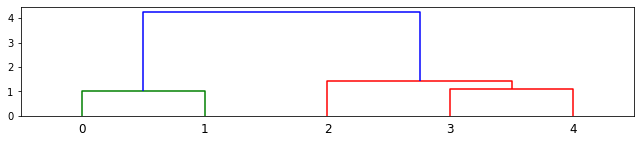

In [4]:
X=np.array([[1,1],[2,1],[5,4],[6,5],[6.5,6]])
X.reshape(5,2)
X=X.transpose()
# print(X)
## write your code here
newX=combine(X)
# print(len(newX))
print('\n Mean of cluster after iteration')
print(newX.transpose())
while len(newX)>1:
  newX=combine(newX.transpose())
  print('\n Mean of cluster after iteration')
  print(newX.transpose())
## validate from inbuilt Dendogram
import plotly.figure_factory as ff

lab=np.linspace(1,X.shape[1],X.shape[1])
fig = ff.create_dendrogram(X.T, labels=lab)
fig.update_layout(width=800, height=300)
fig.show()

from scipy.cluster.hierarchy import dendrogram, linkage 
from matplotlib import pyplot as plt 
X = X.T
Z = linkage(X, 'single') 
fig = plt.figure(figsize=(11, 2)) 
dn = dendrogram(Z)
